In [2]:
# Import packages

import numpy as np

# Plot style & colormap
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import ImageGrid

# Pre-defined colormap
top = mpl.cm.get_cmap('Oranges_r', 128)
bottom = mpl.cm.get_cmap('Blues', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

In [24]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 1.5,
        'lines.linestyle': '-',
        'lines.marker': '',
        'lines.markersize': 5,
        'legend.fontsize': 14,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

In [4]:
# optimisation history path
#optim_hist_path = '../wf-outputs/optim-hist/optim_hist_poly_project_{}_bins.npy'
optim_hist_path = '../wf-outputs/optim-hist/optim_hist_poly_%s_cycles_256_%s_d%s_%sz.npy'

In [5]:
# Load optimisation history
n_cycles = [2, 5, 9]
#
dataset_list = [('2', 'no_proj', '2', '45'),('2', 'no_proj', '2', '60'),('5', 'no_proj', '2', '45'),('5', 'proj', '2', '45'),('5', 'proj', '2', '60'),('5', 'proj', '5', '45'),('9', 'no_proj', '2', '45'),('9', 'proj', '2', '45')]
dataset_list.reverse()
optim_hist_list = [np.load(optim_hist_path % data_params, allow_pickle=True)[()] for data_params in dataset_list]


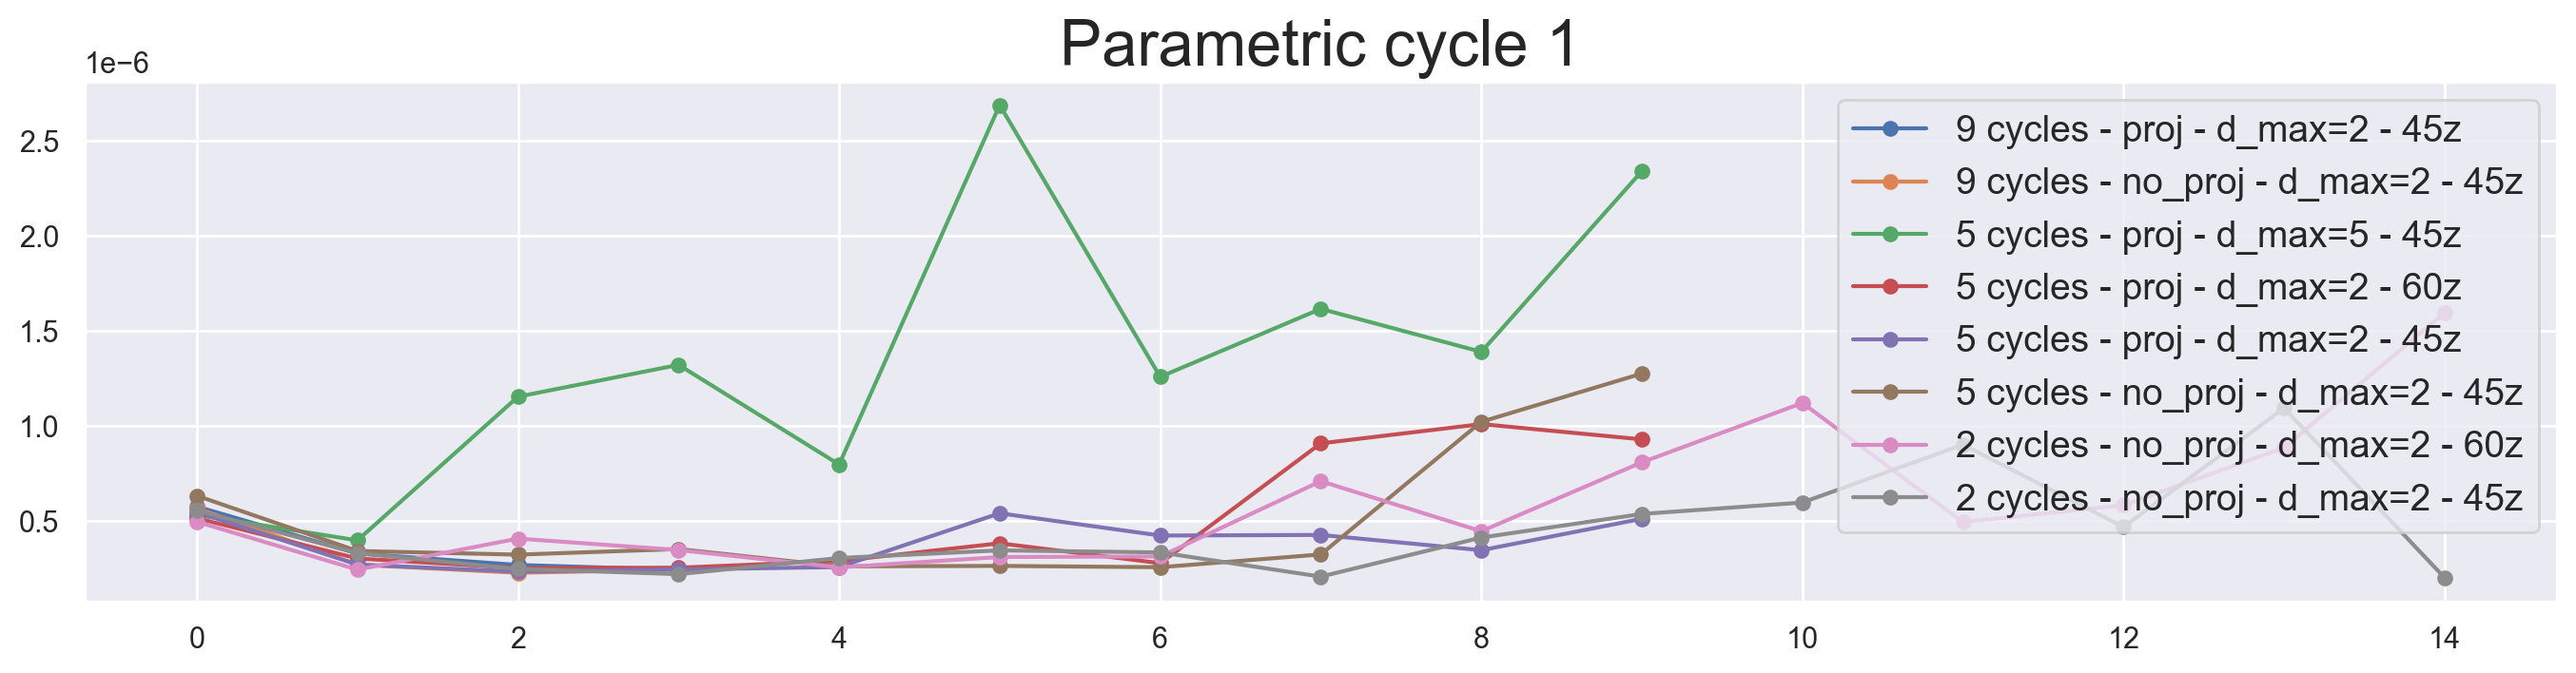

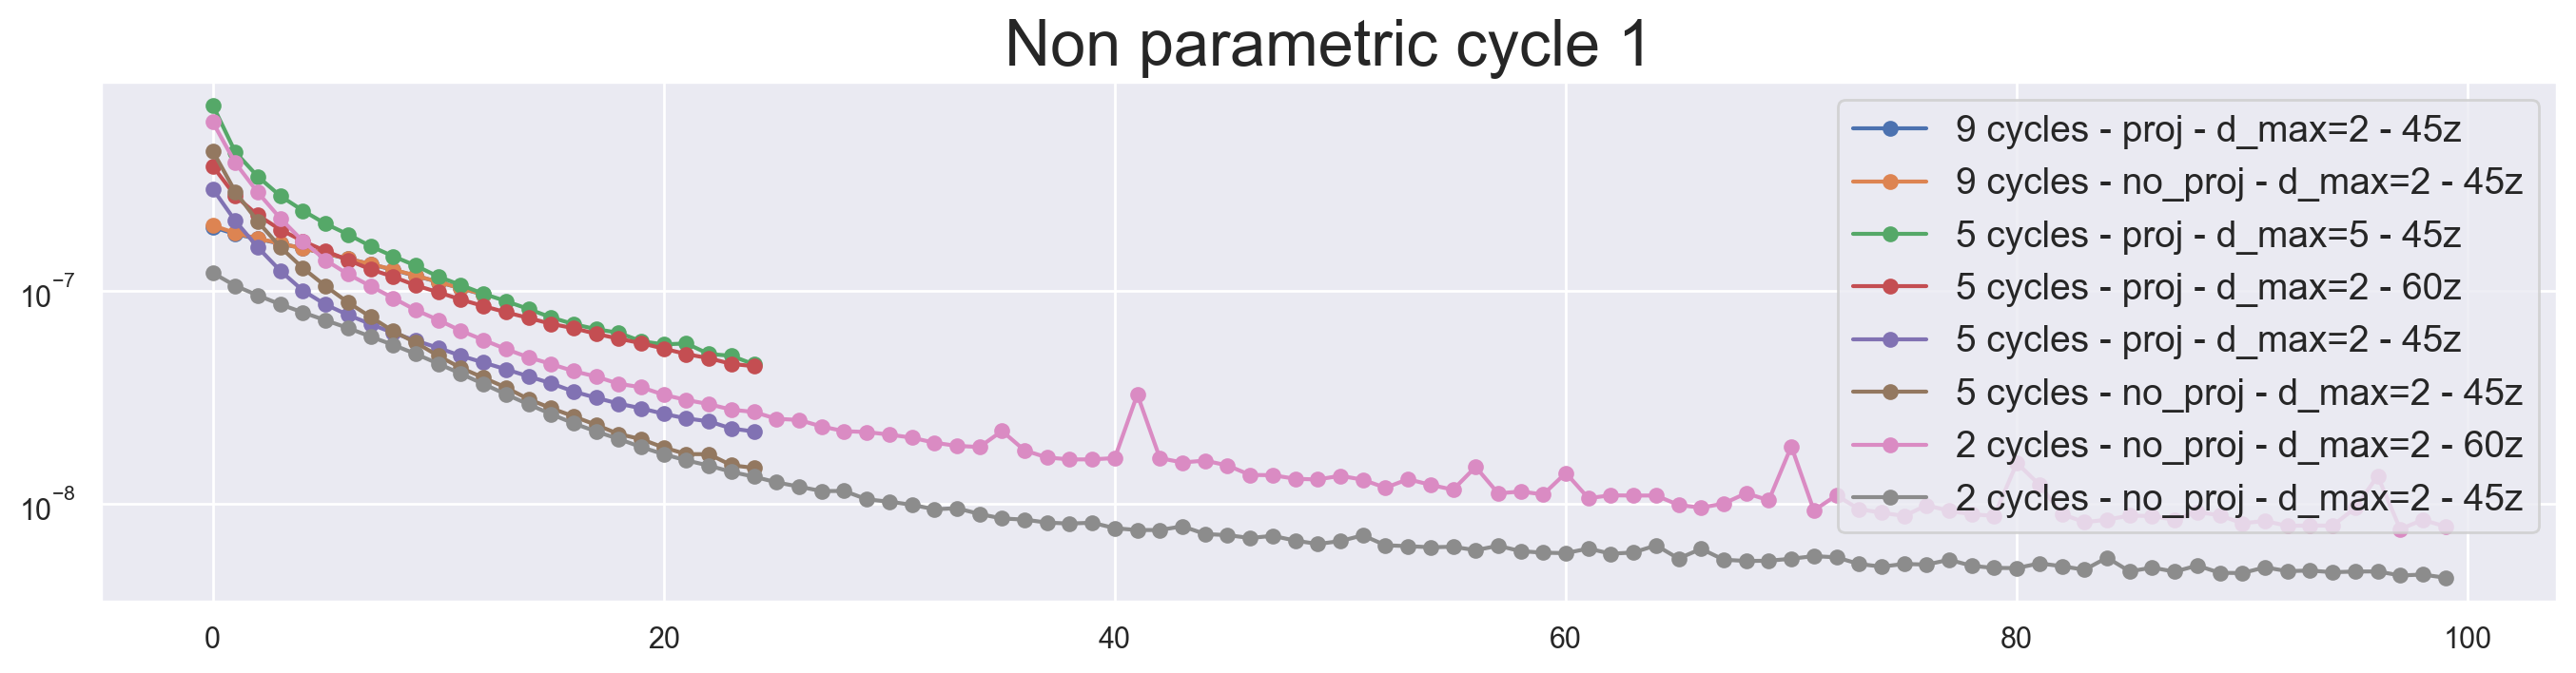

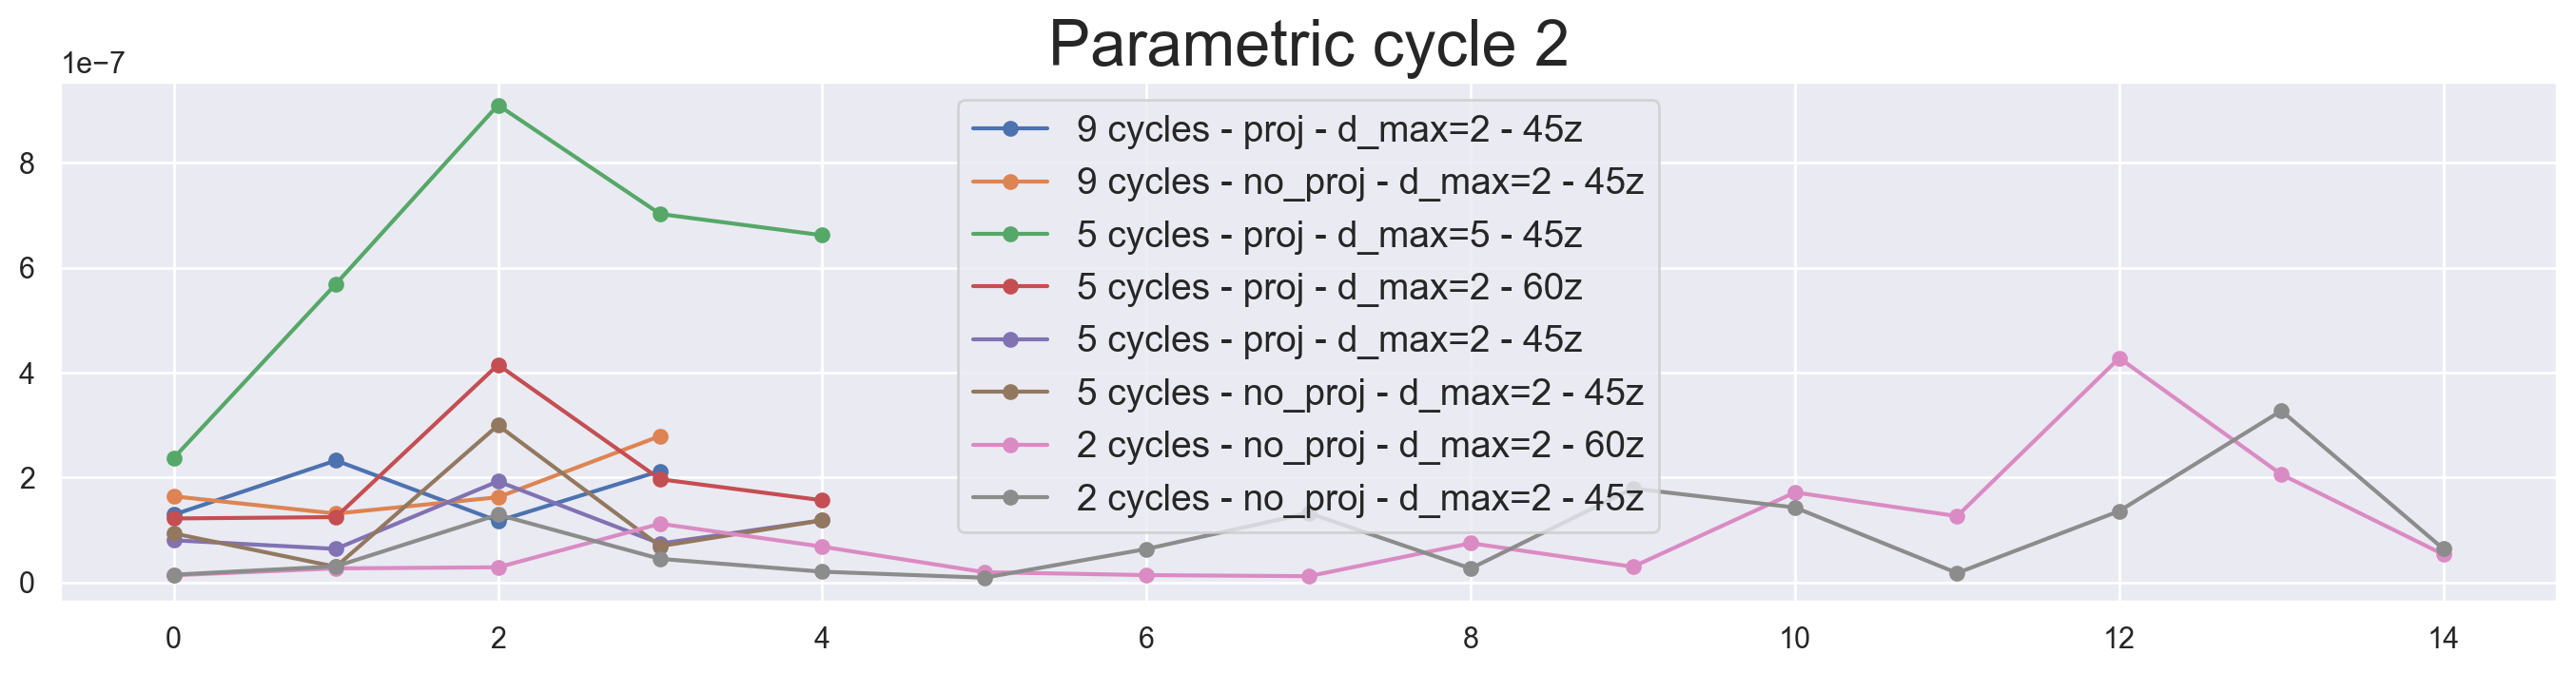

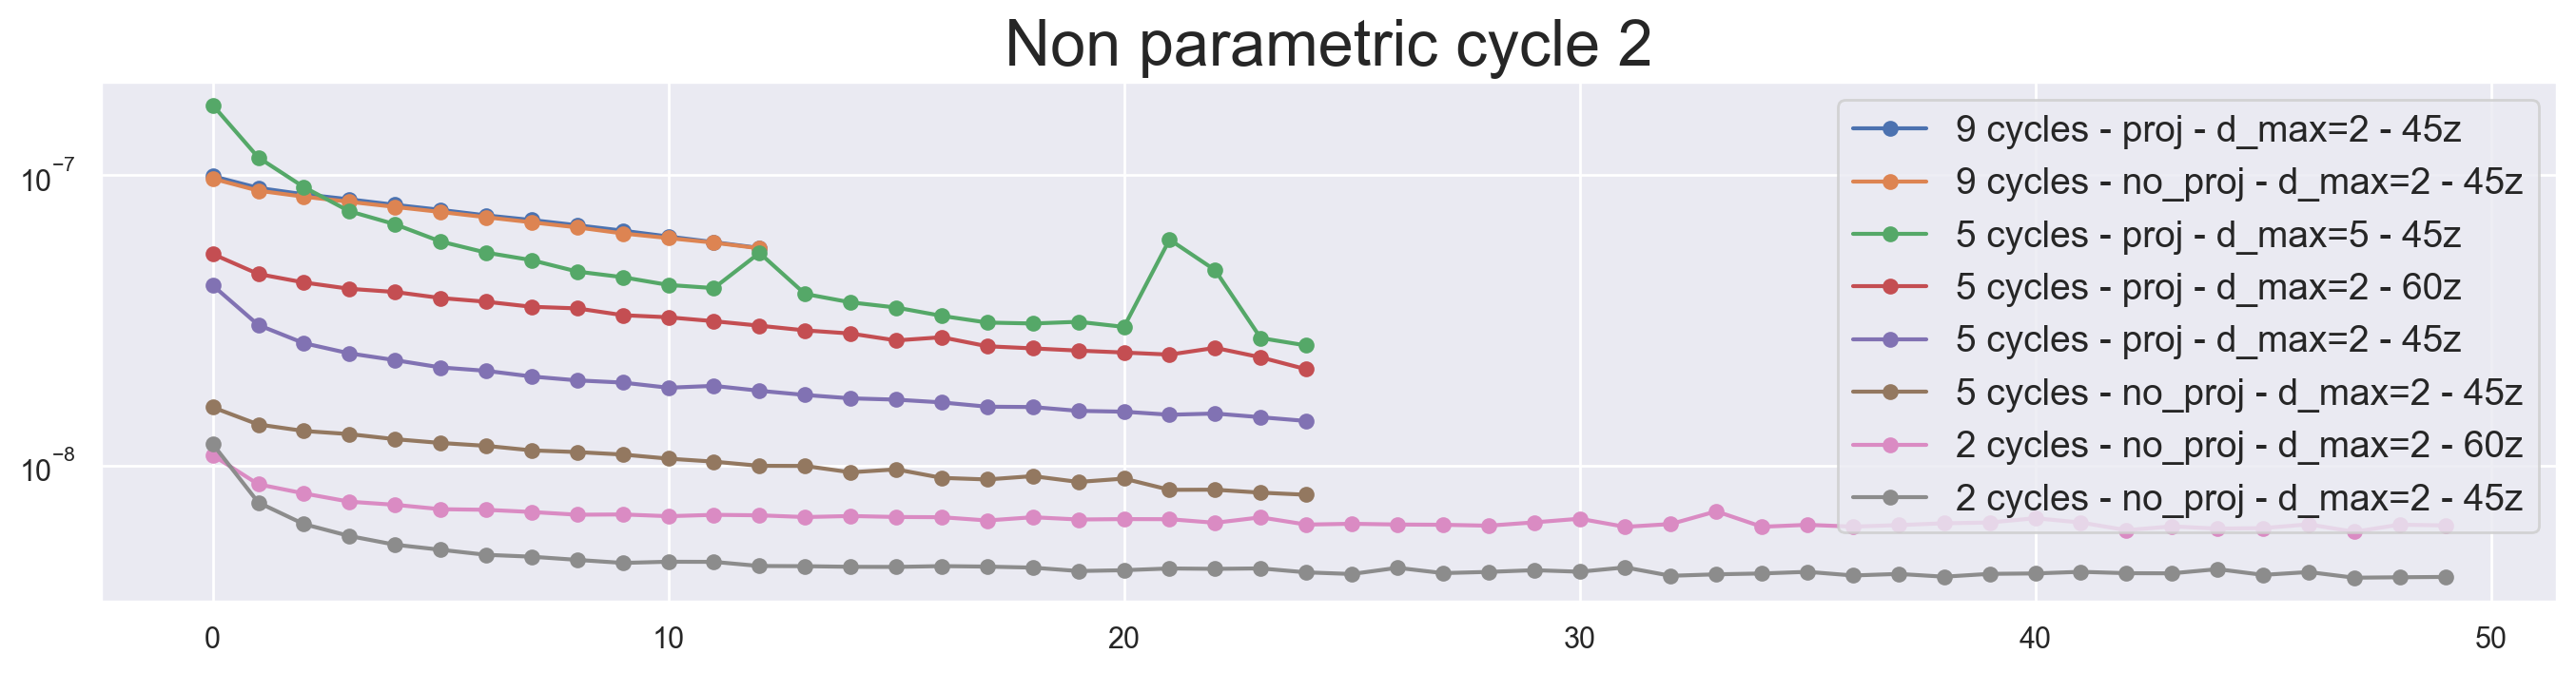

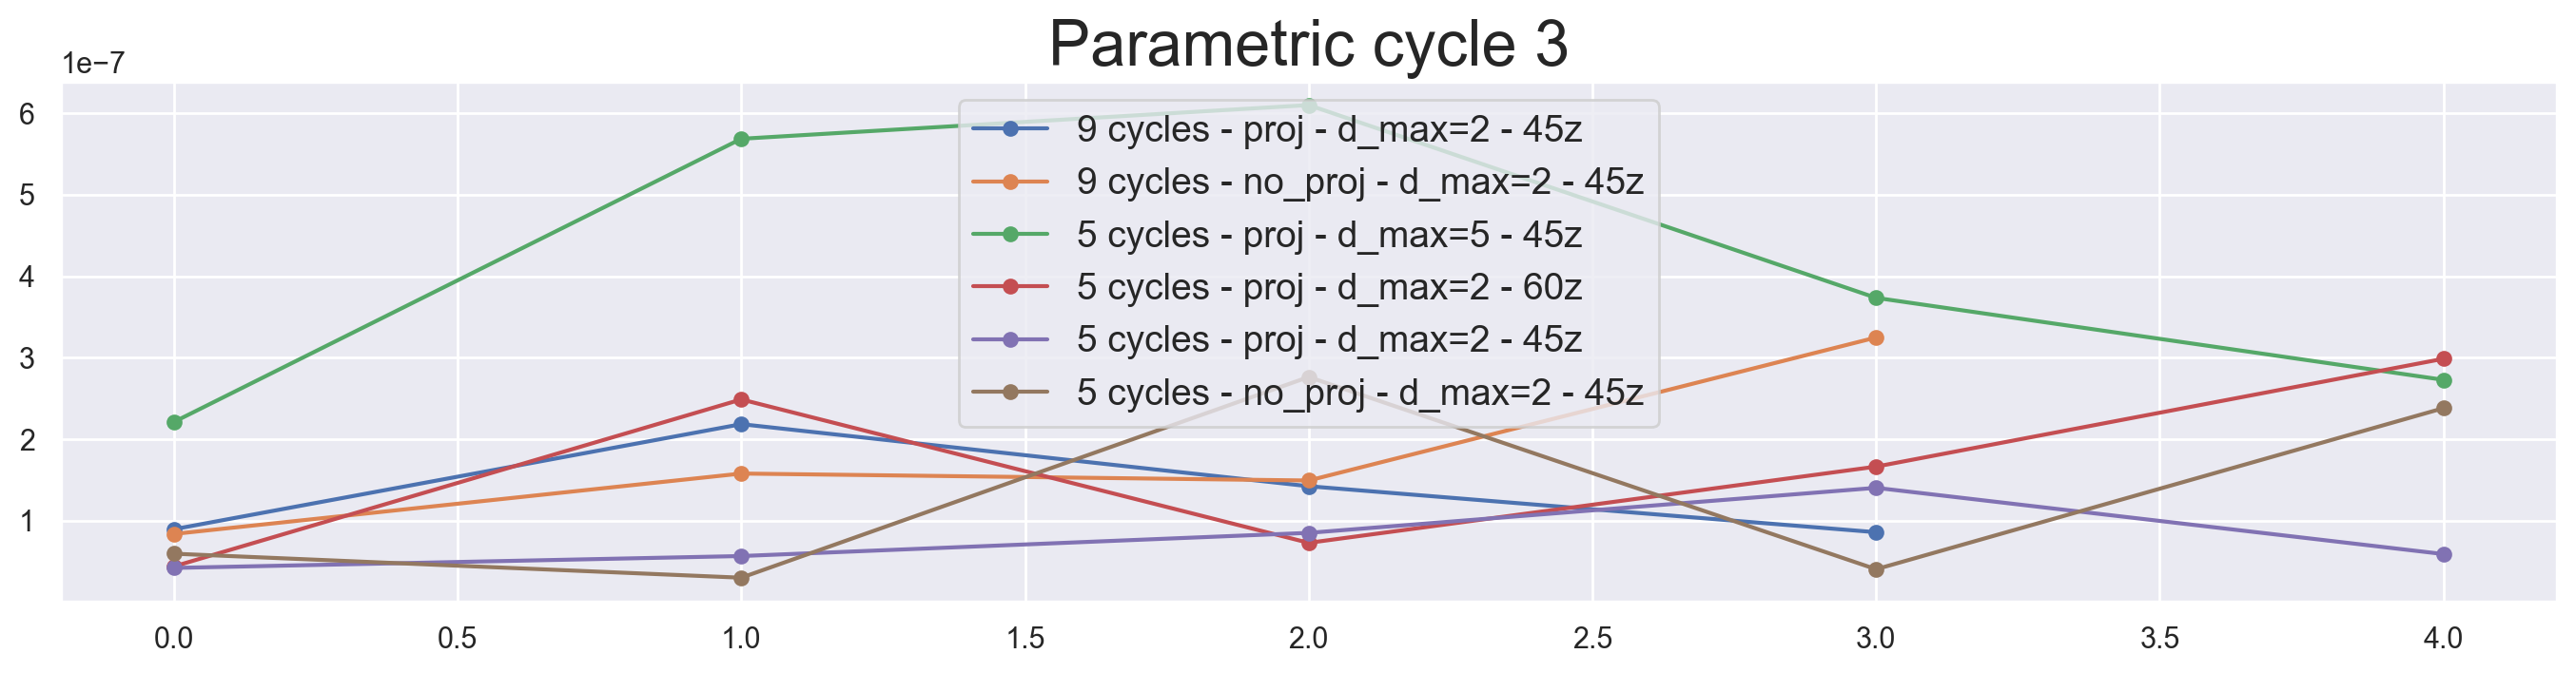

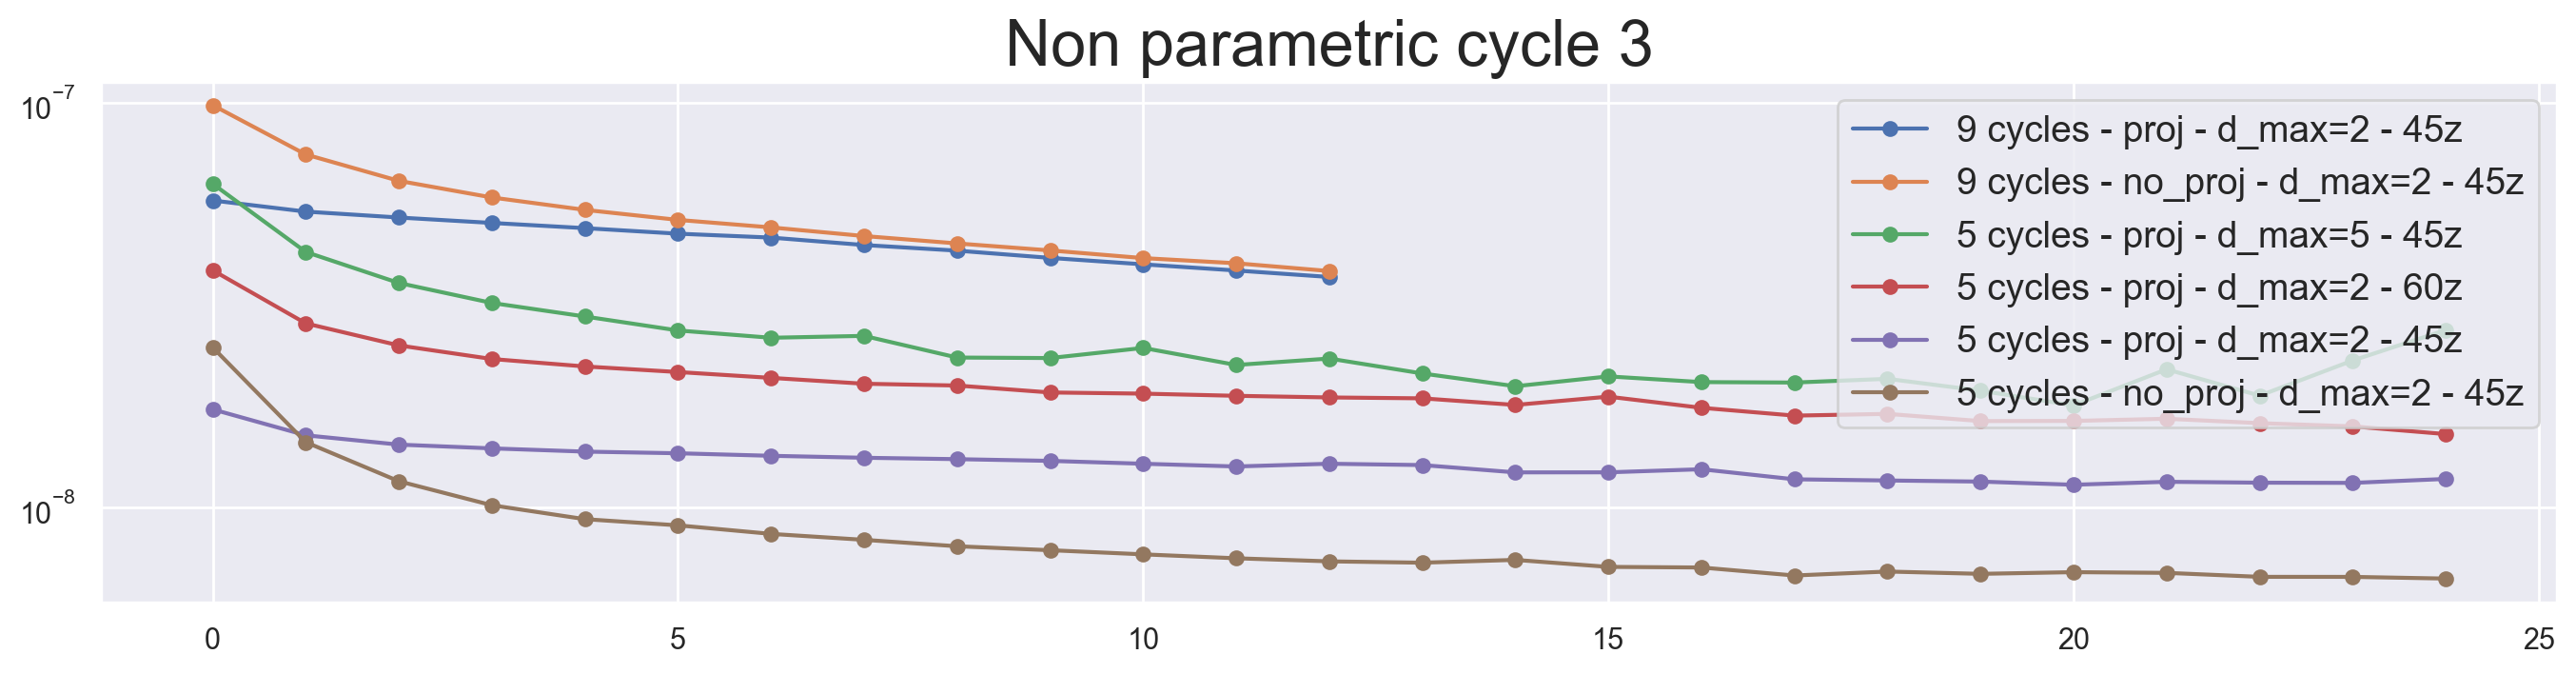

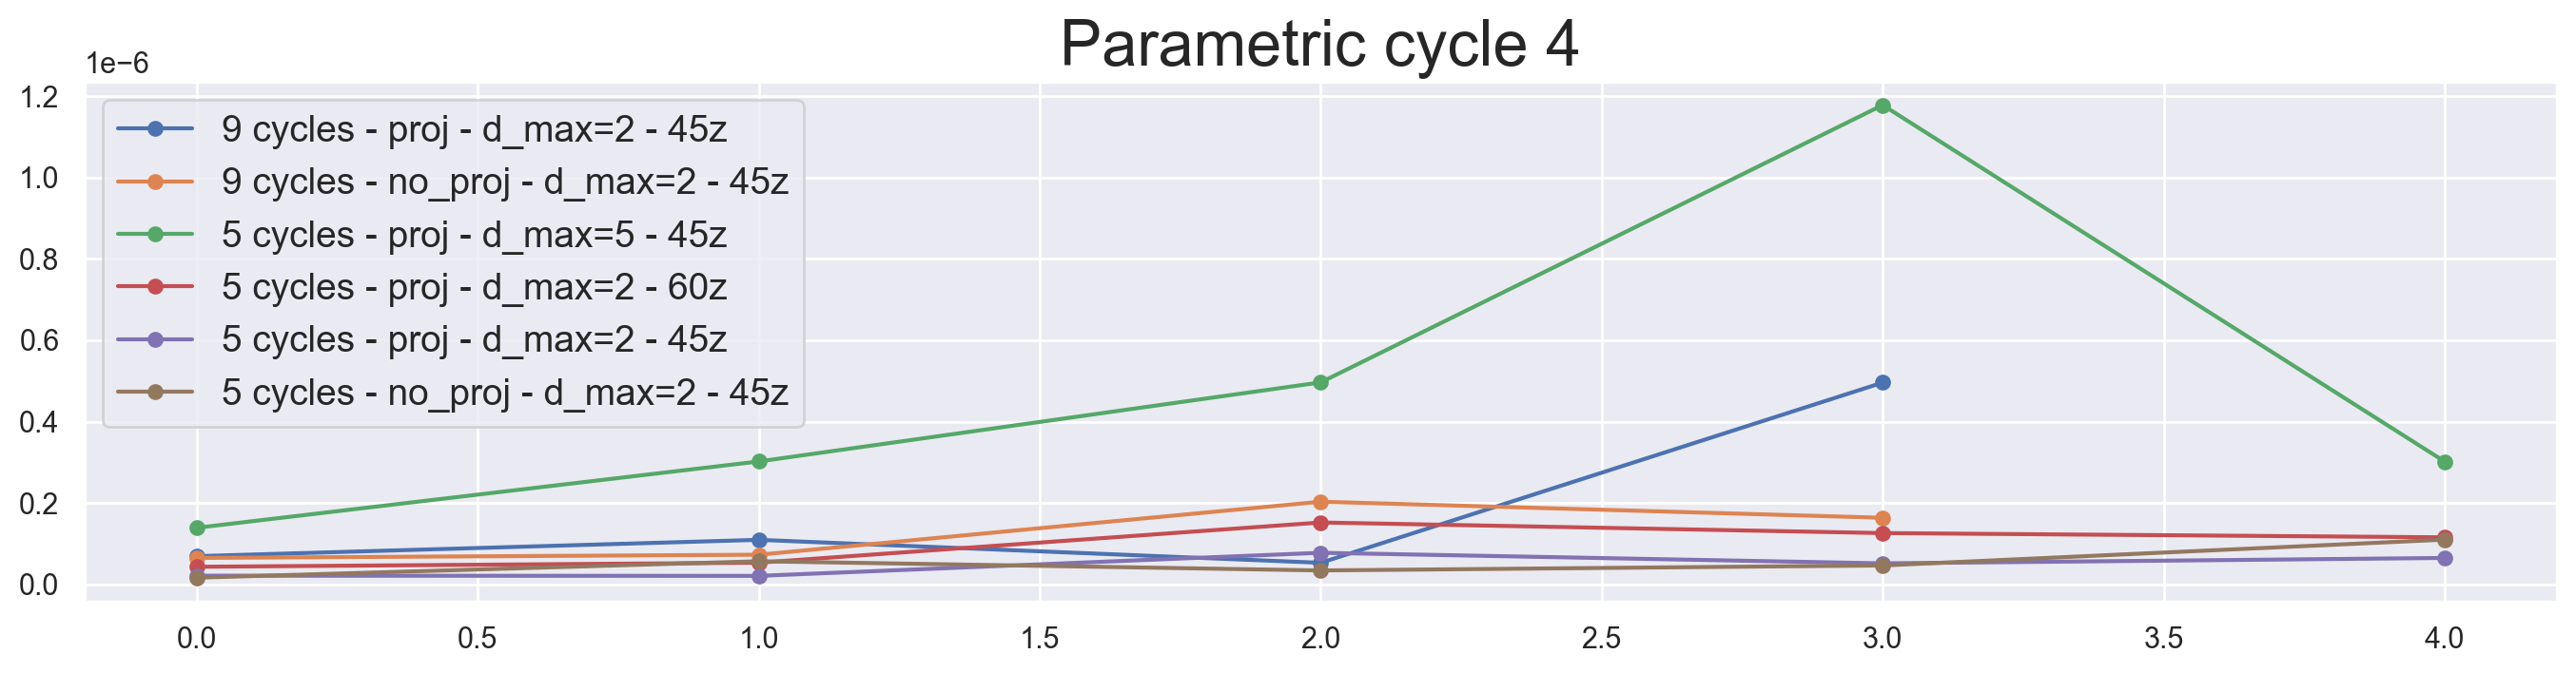

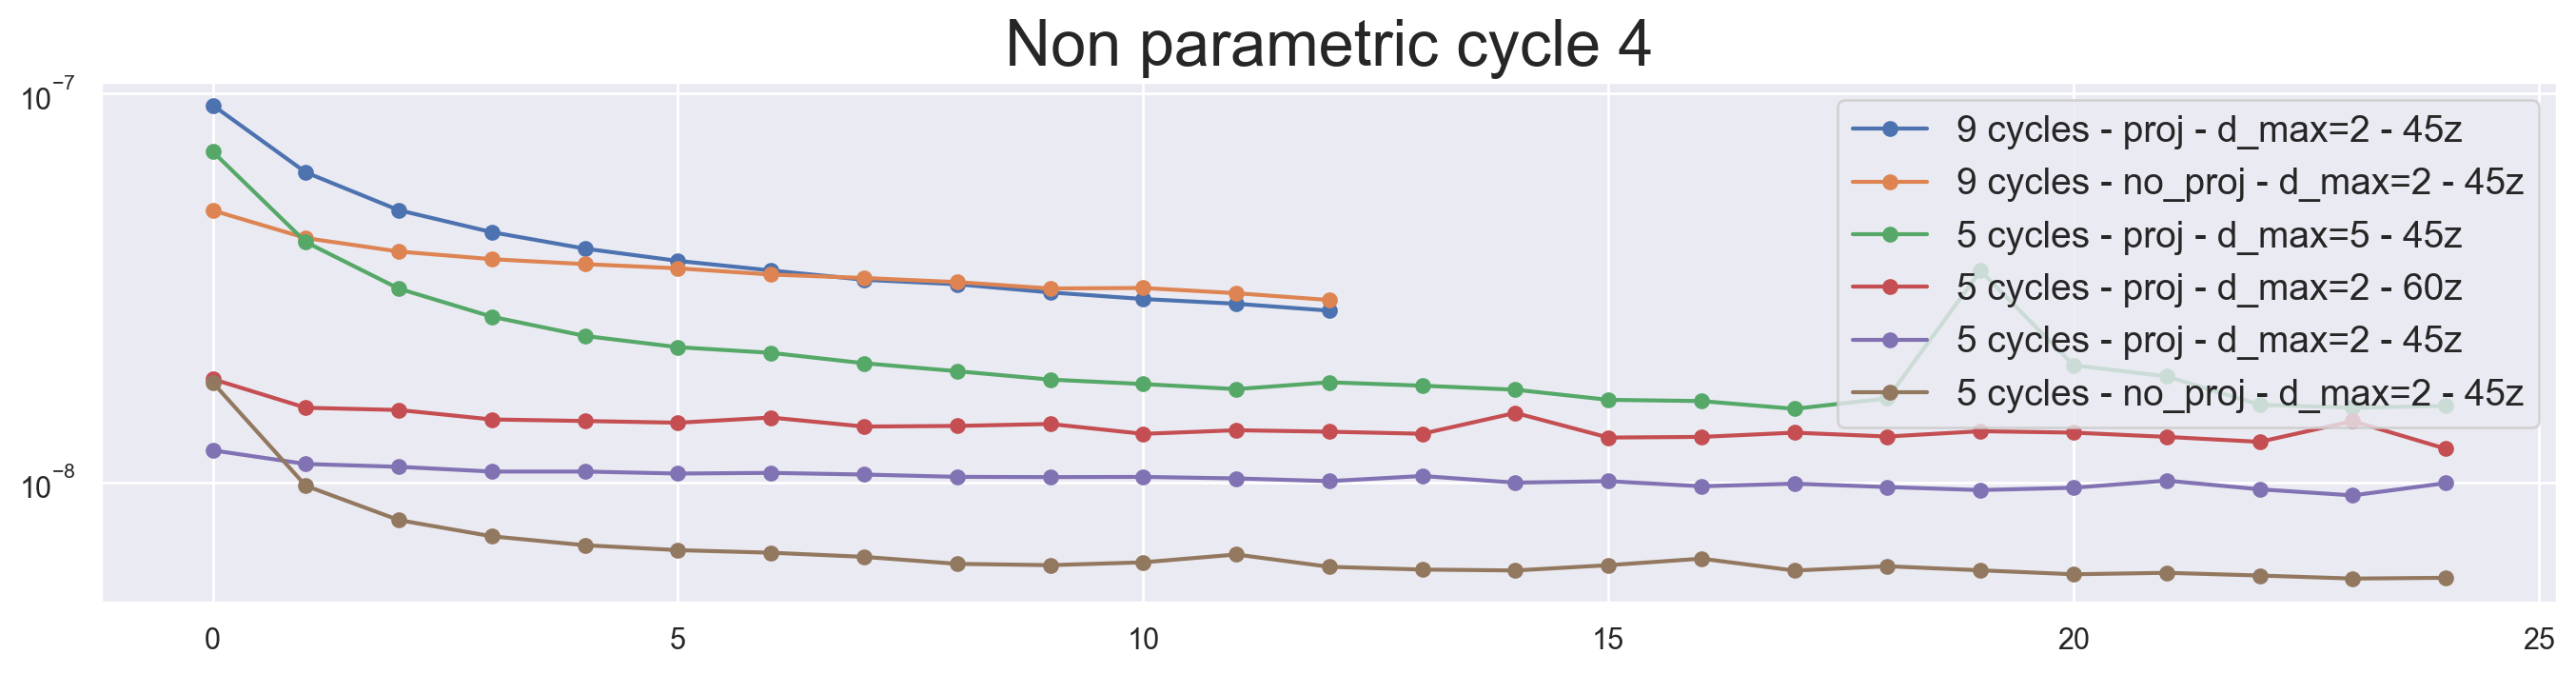

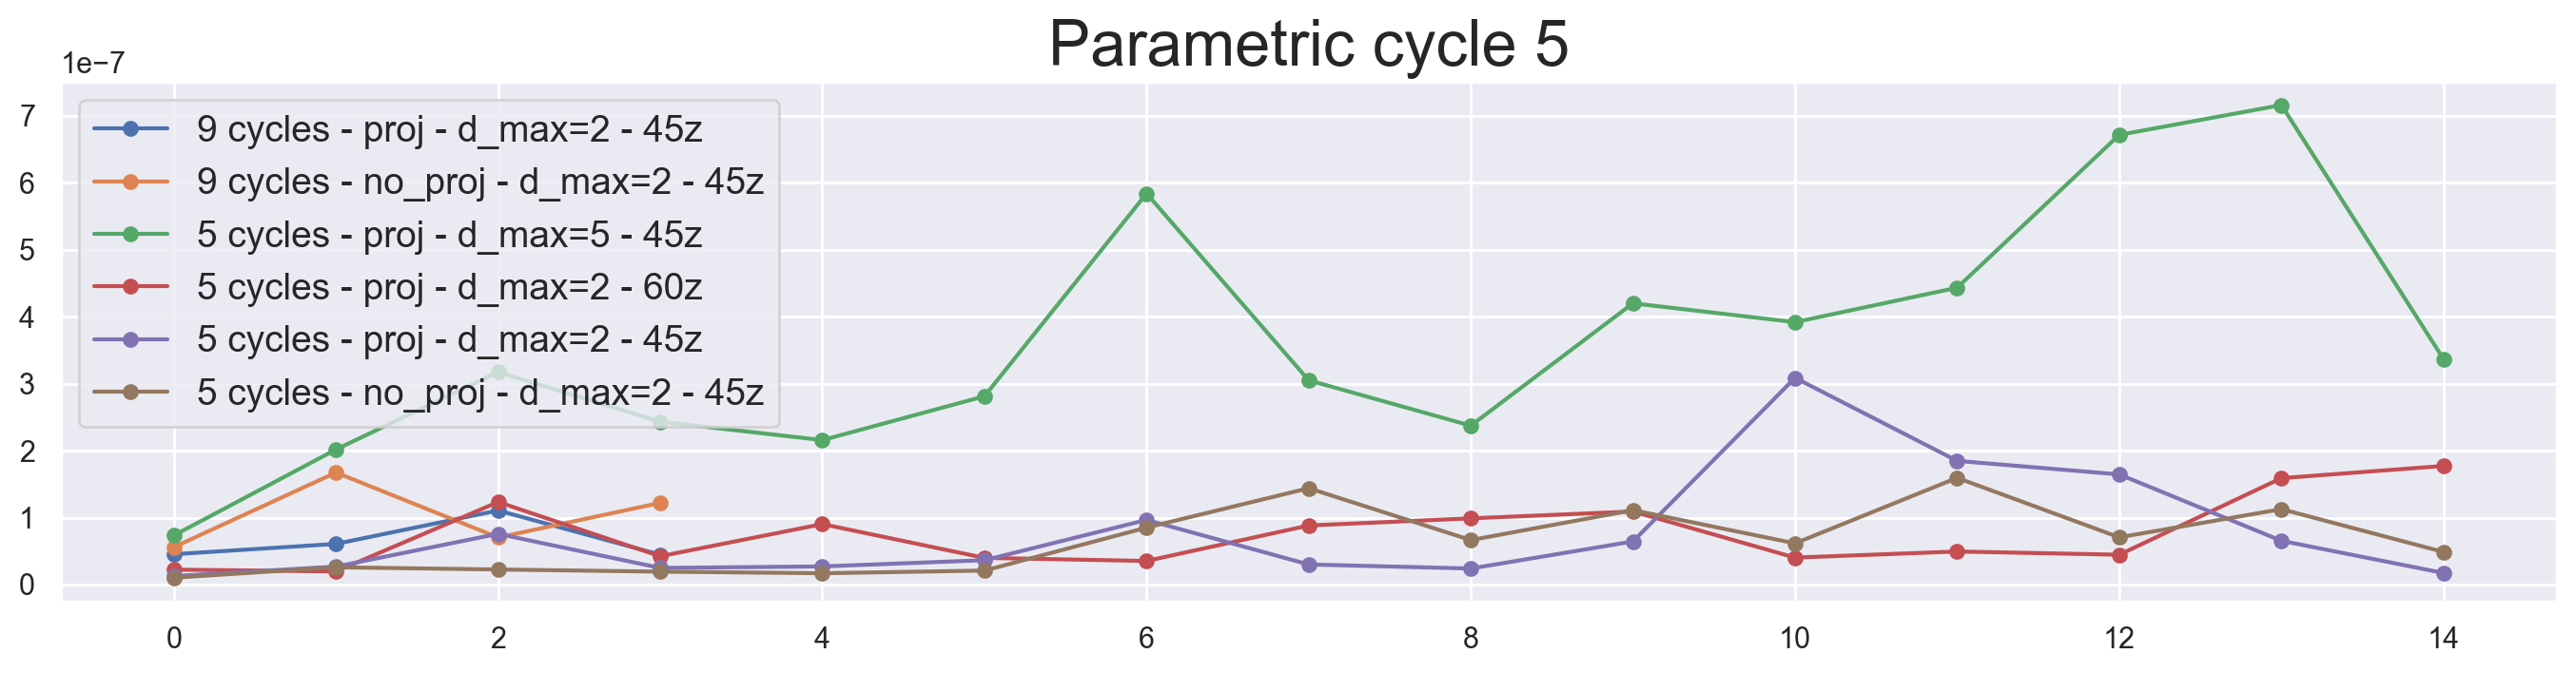

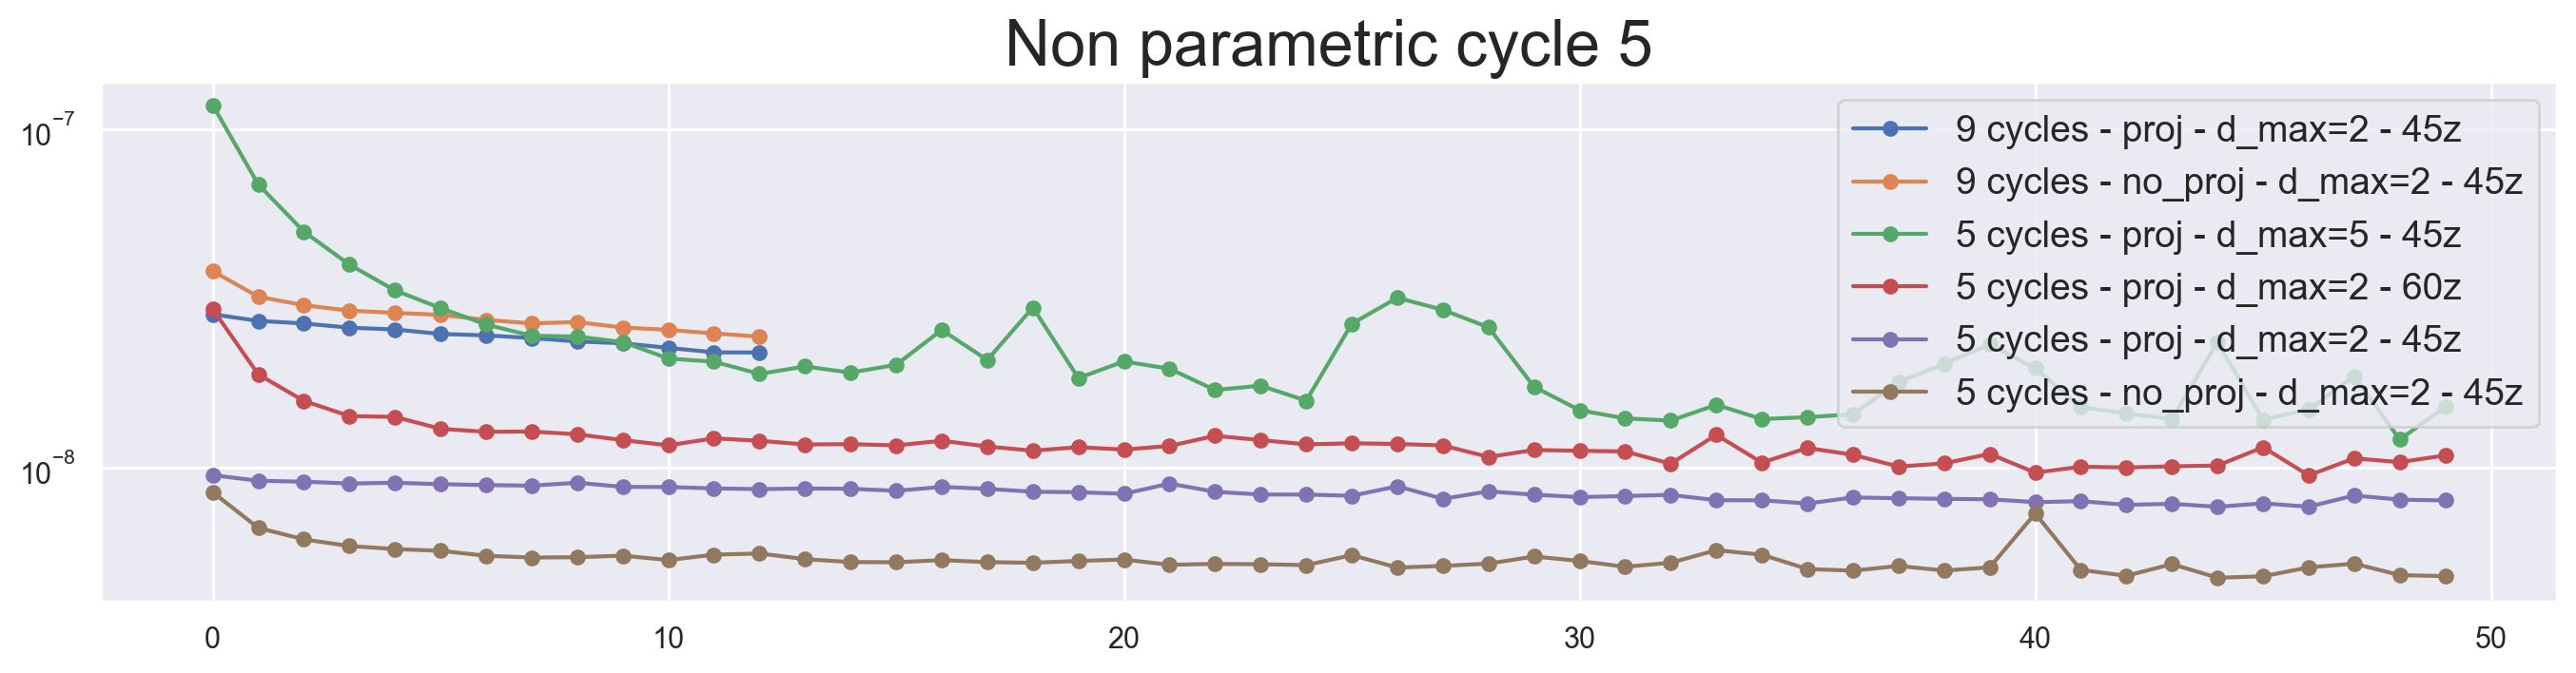

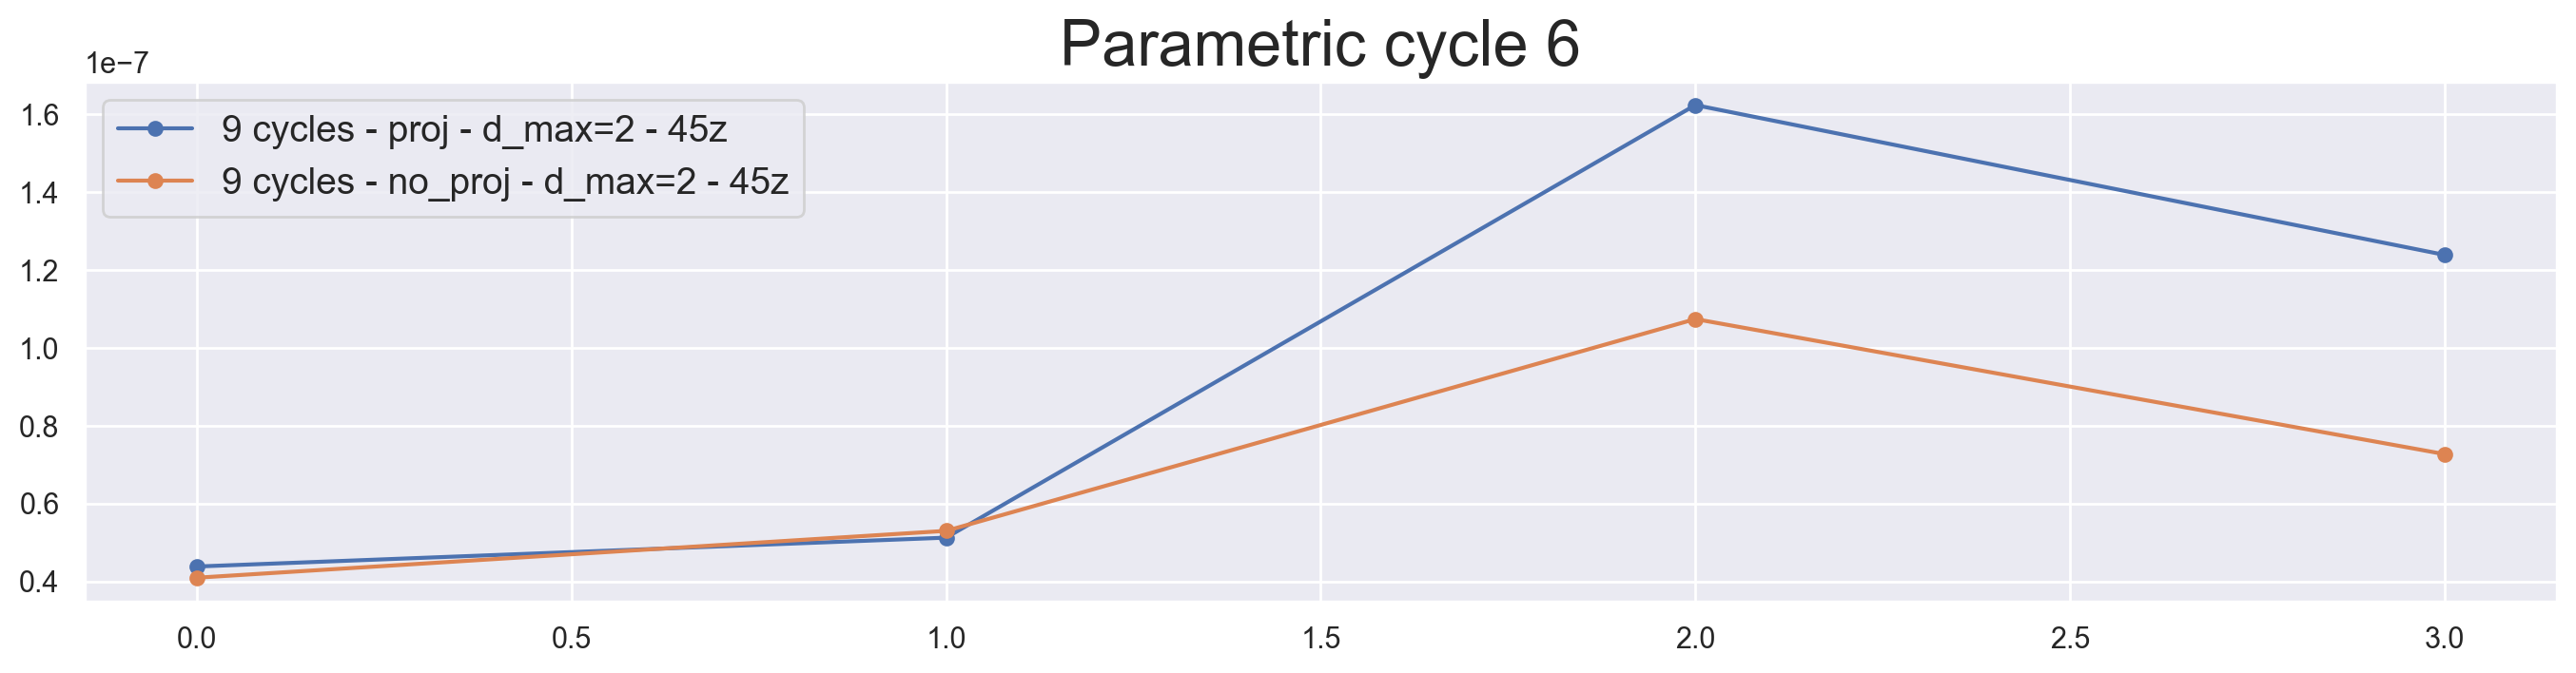

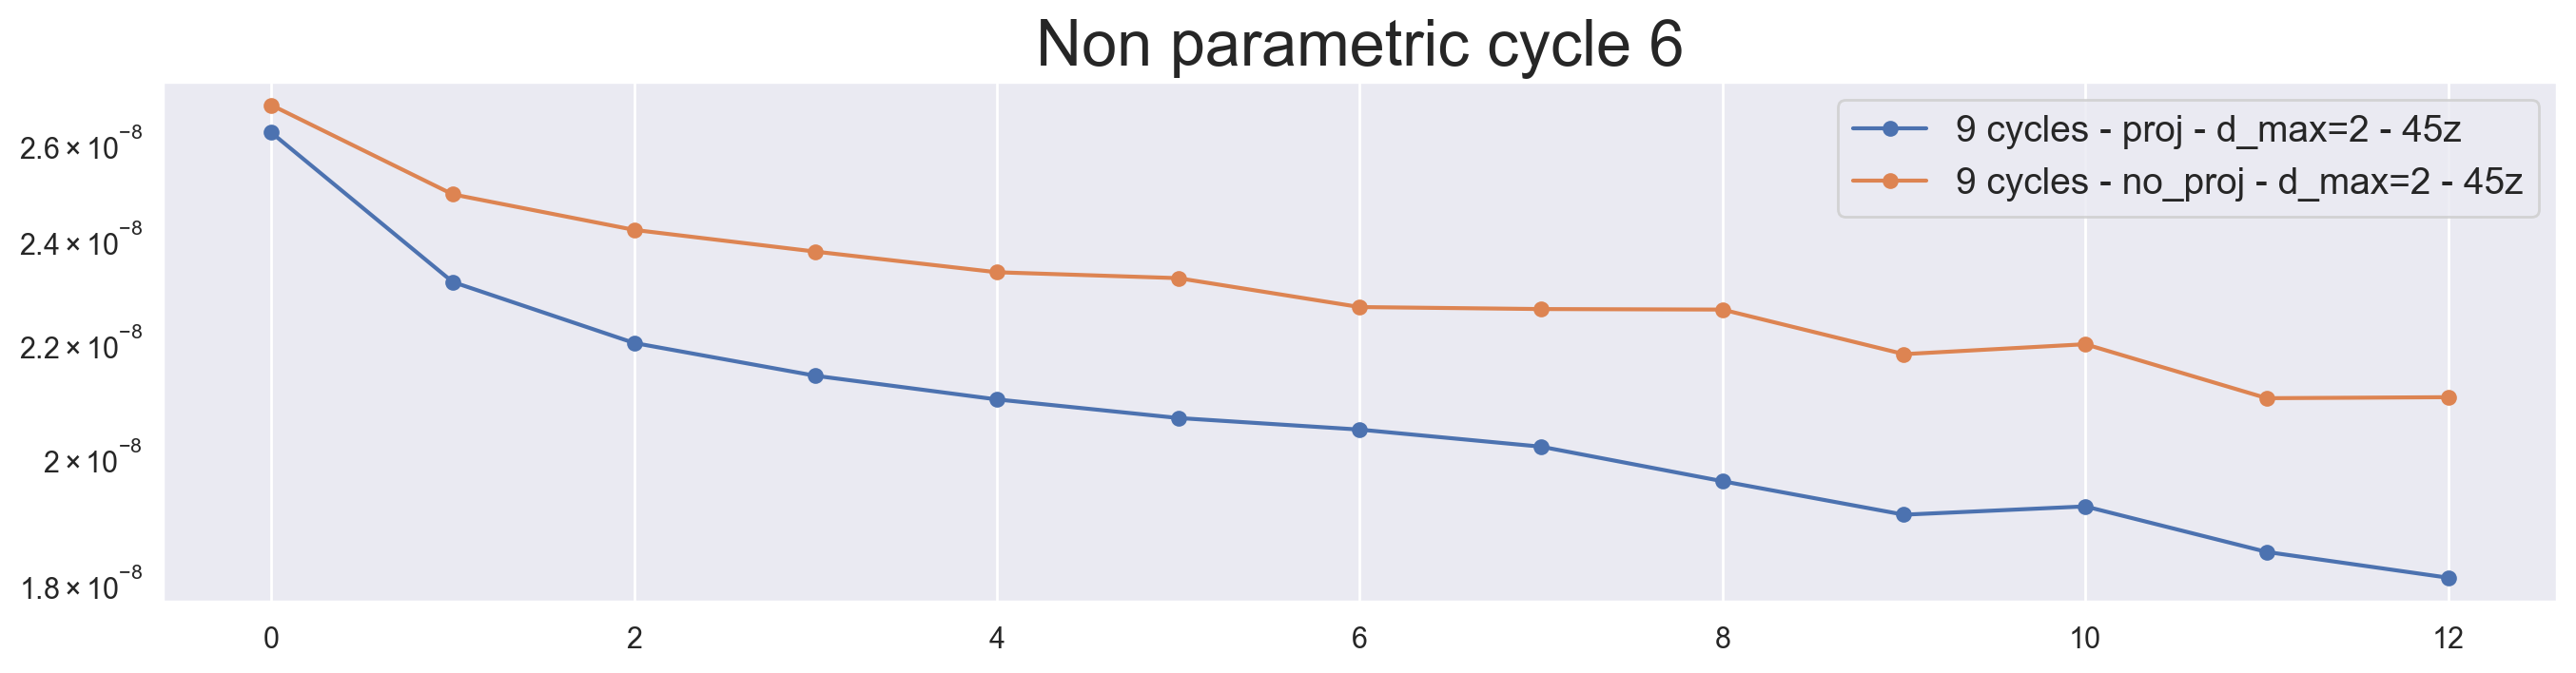

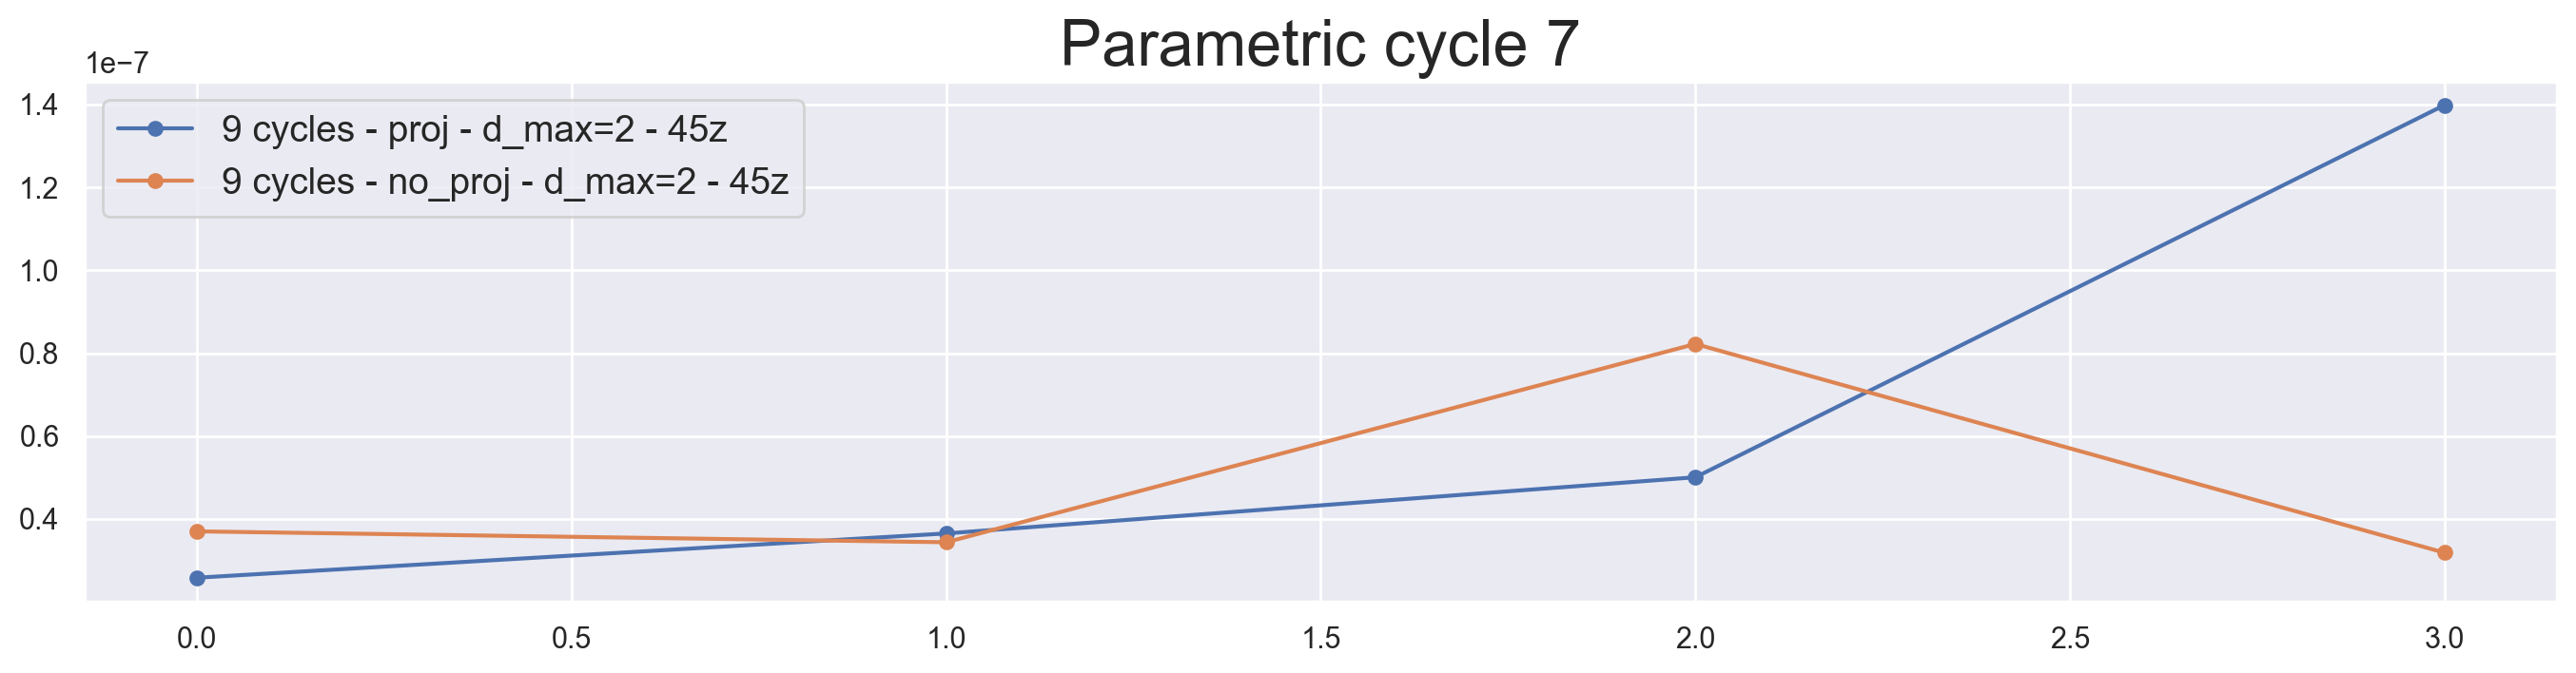

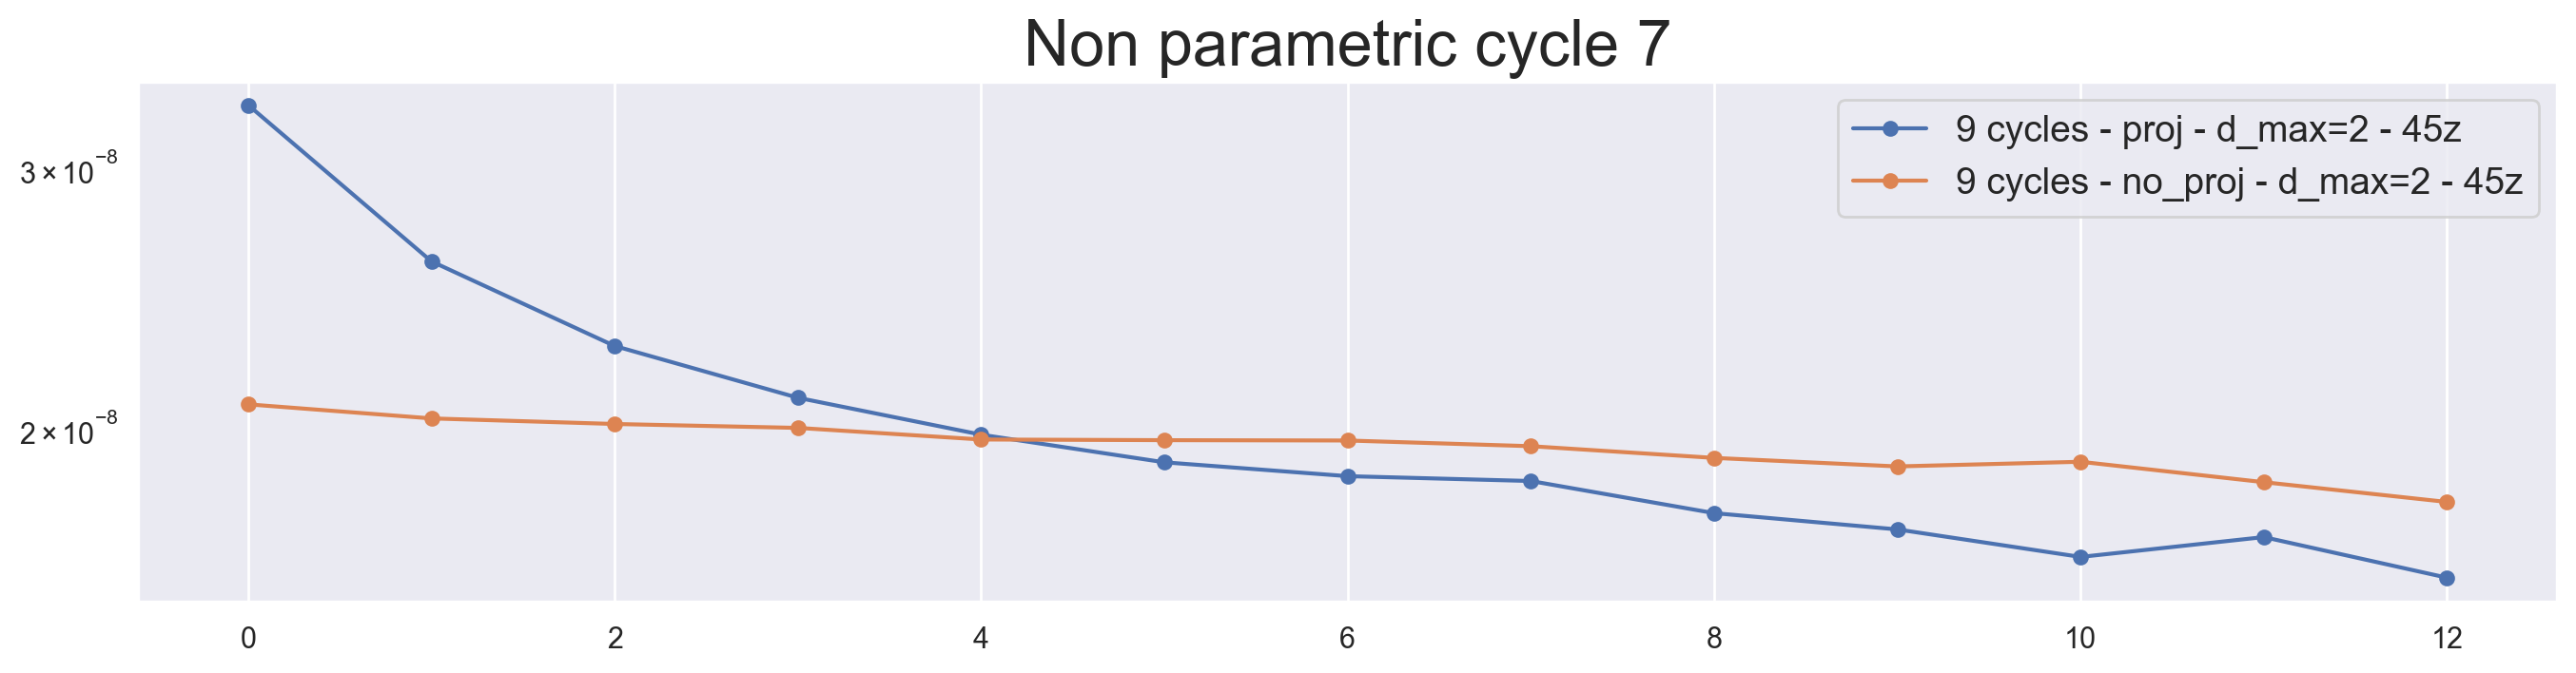

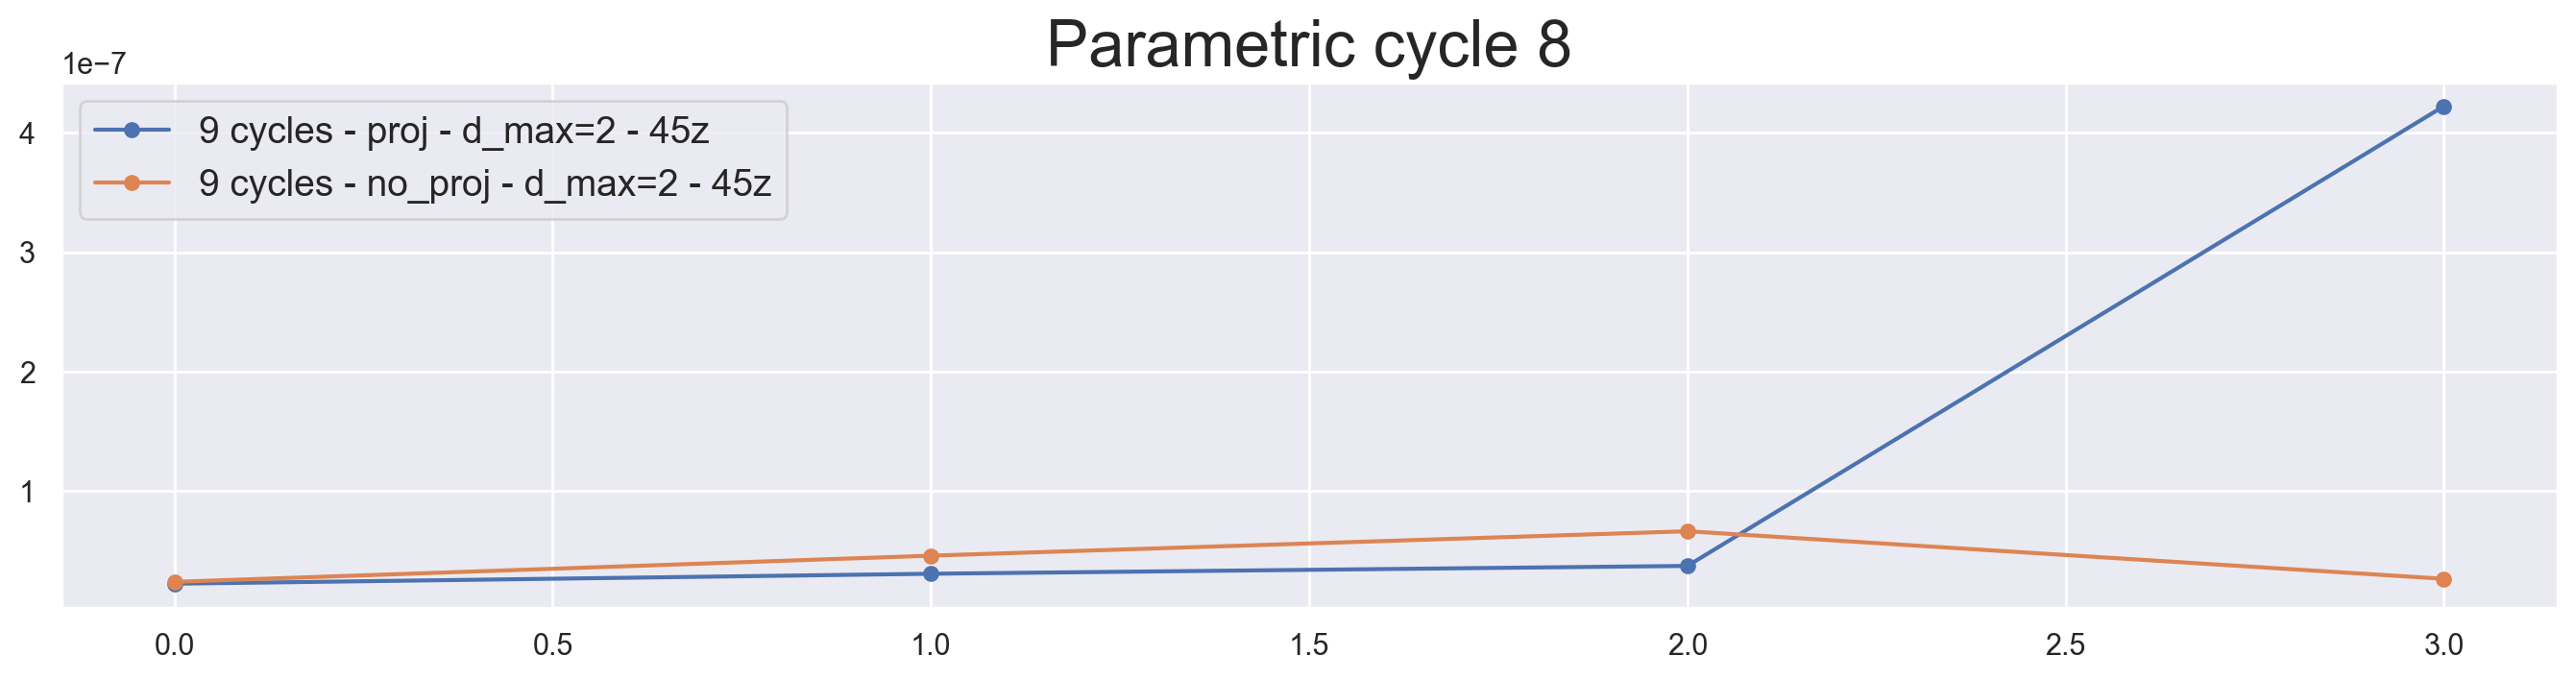

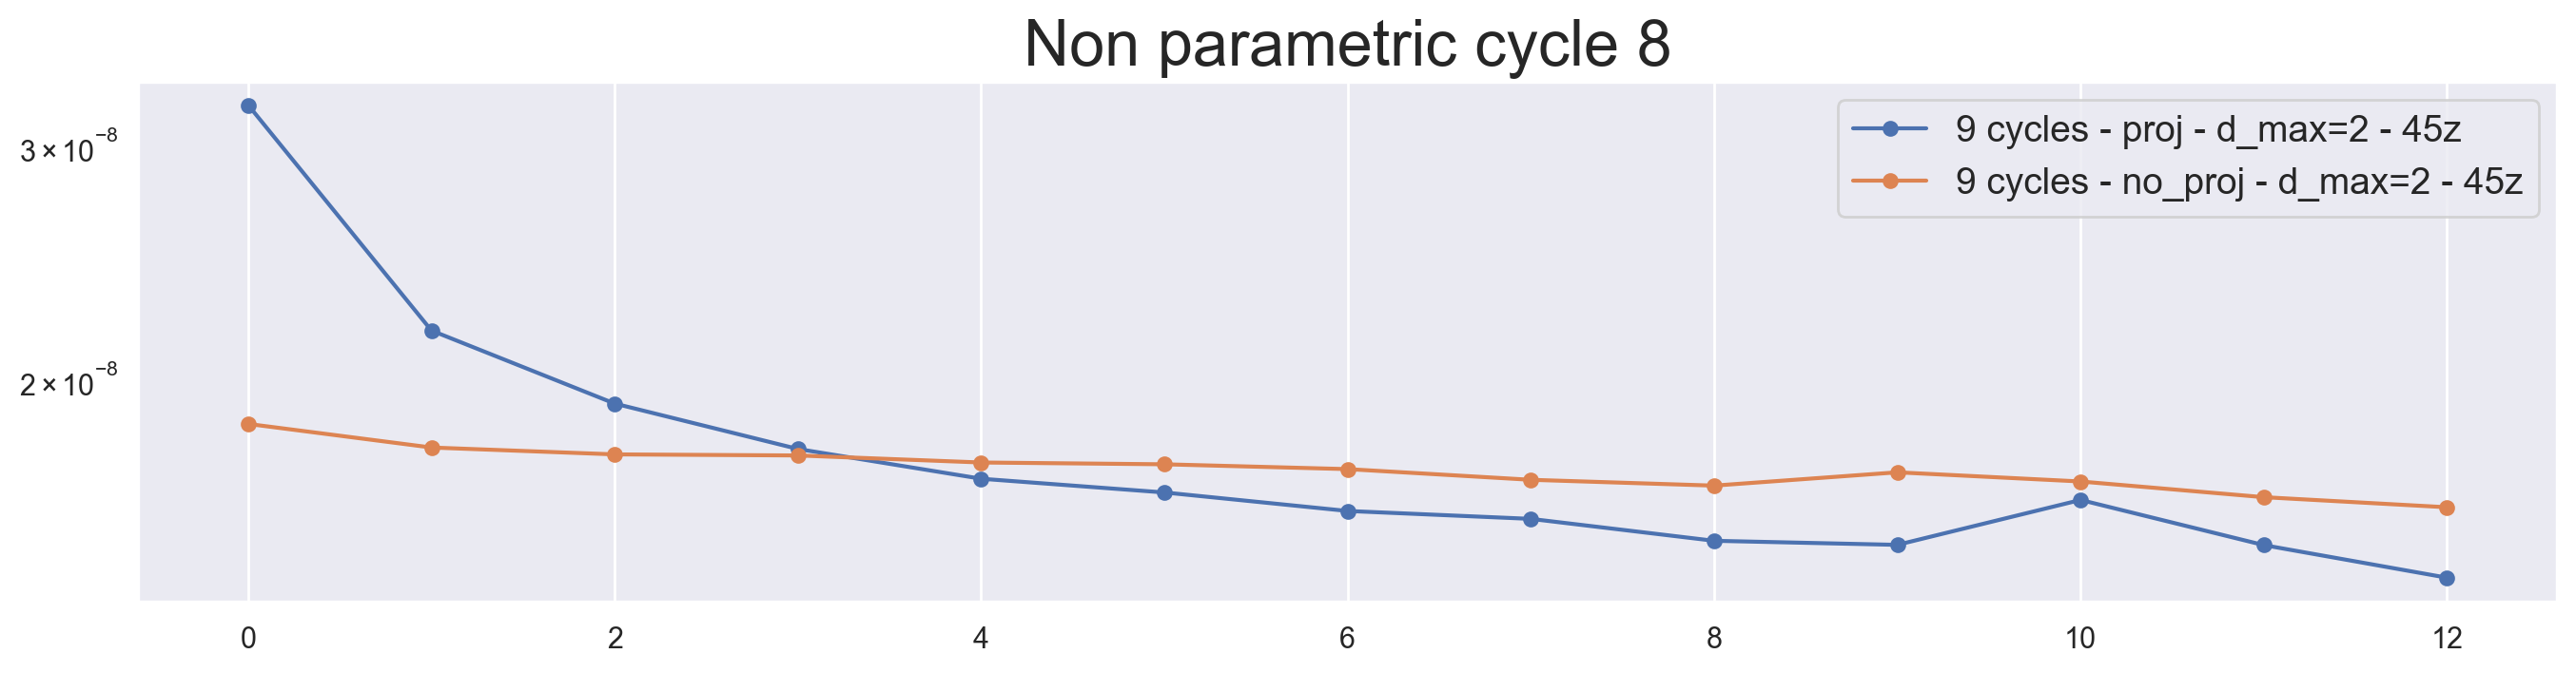

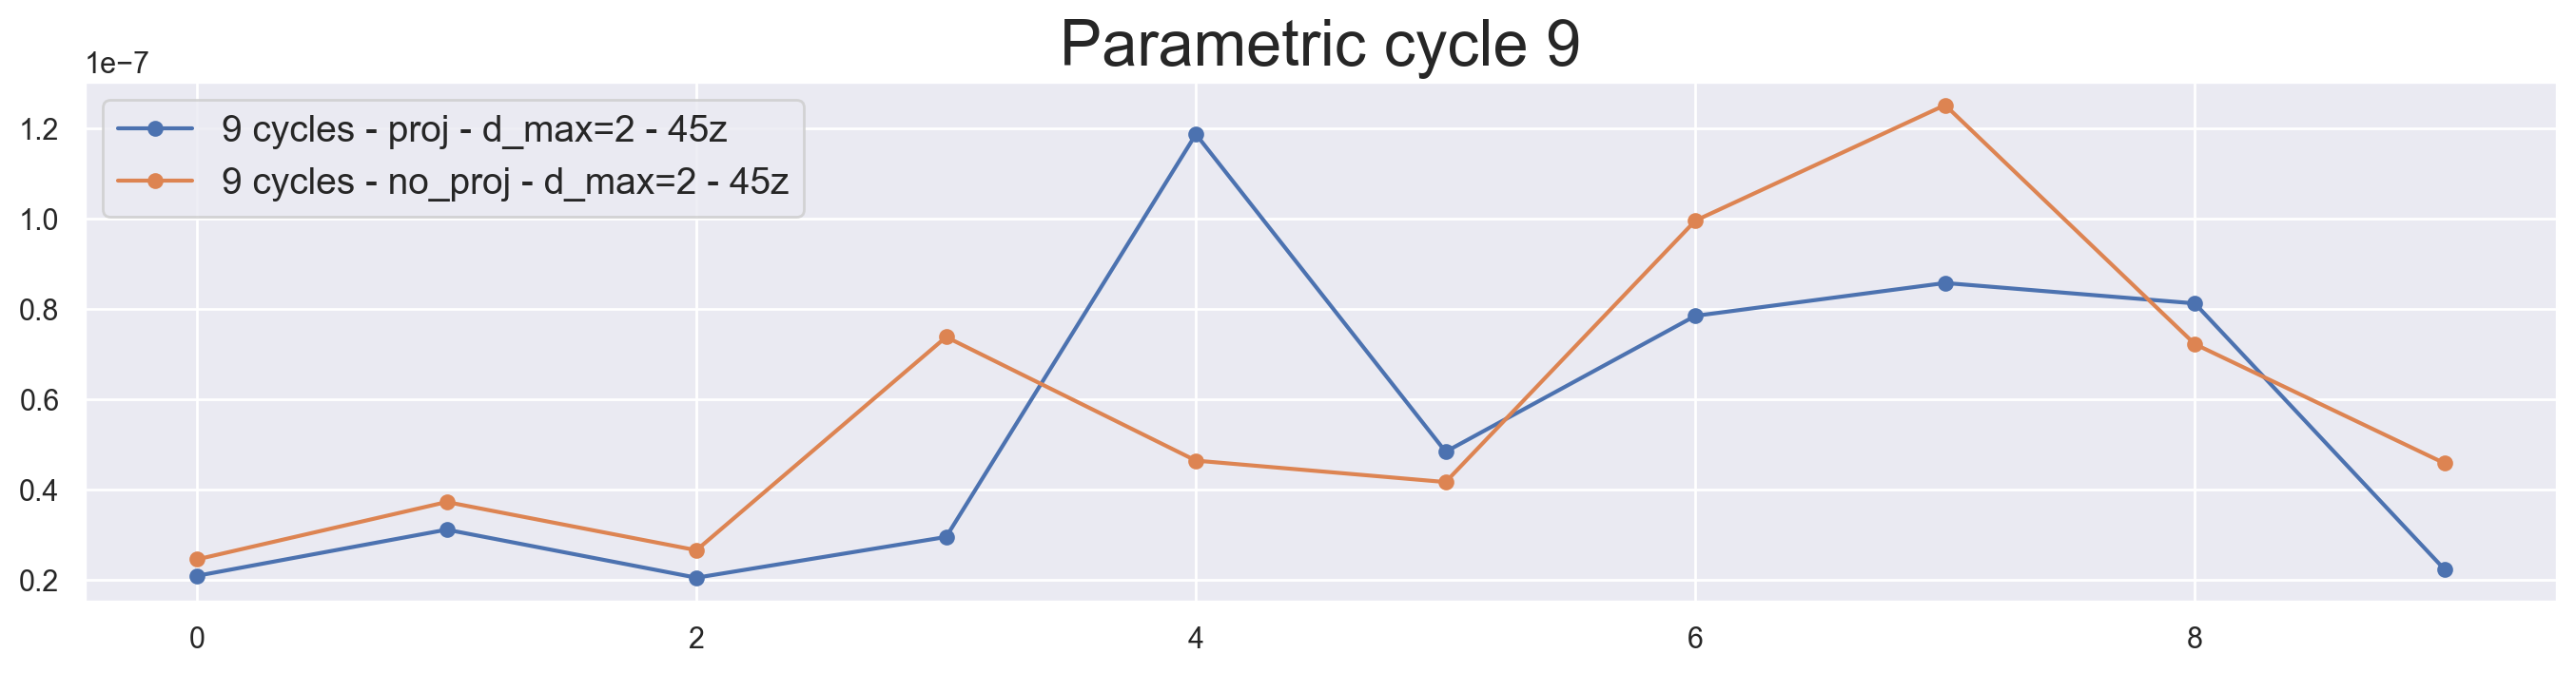

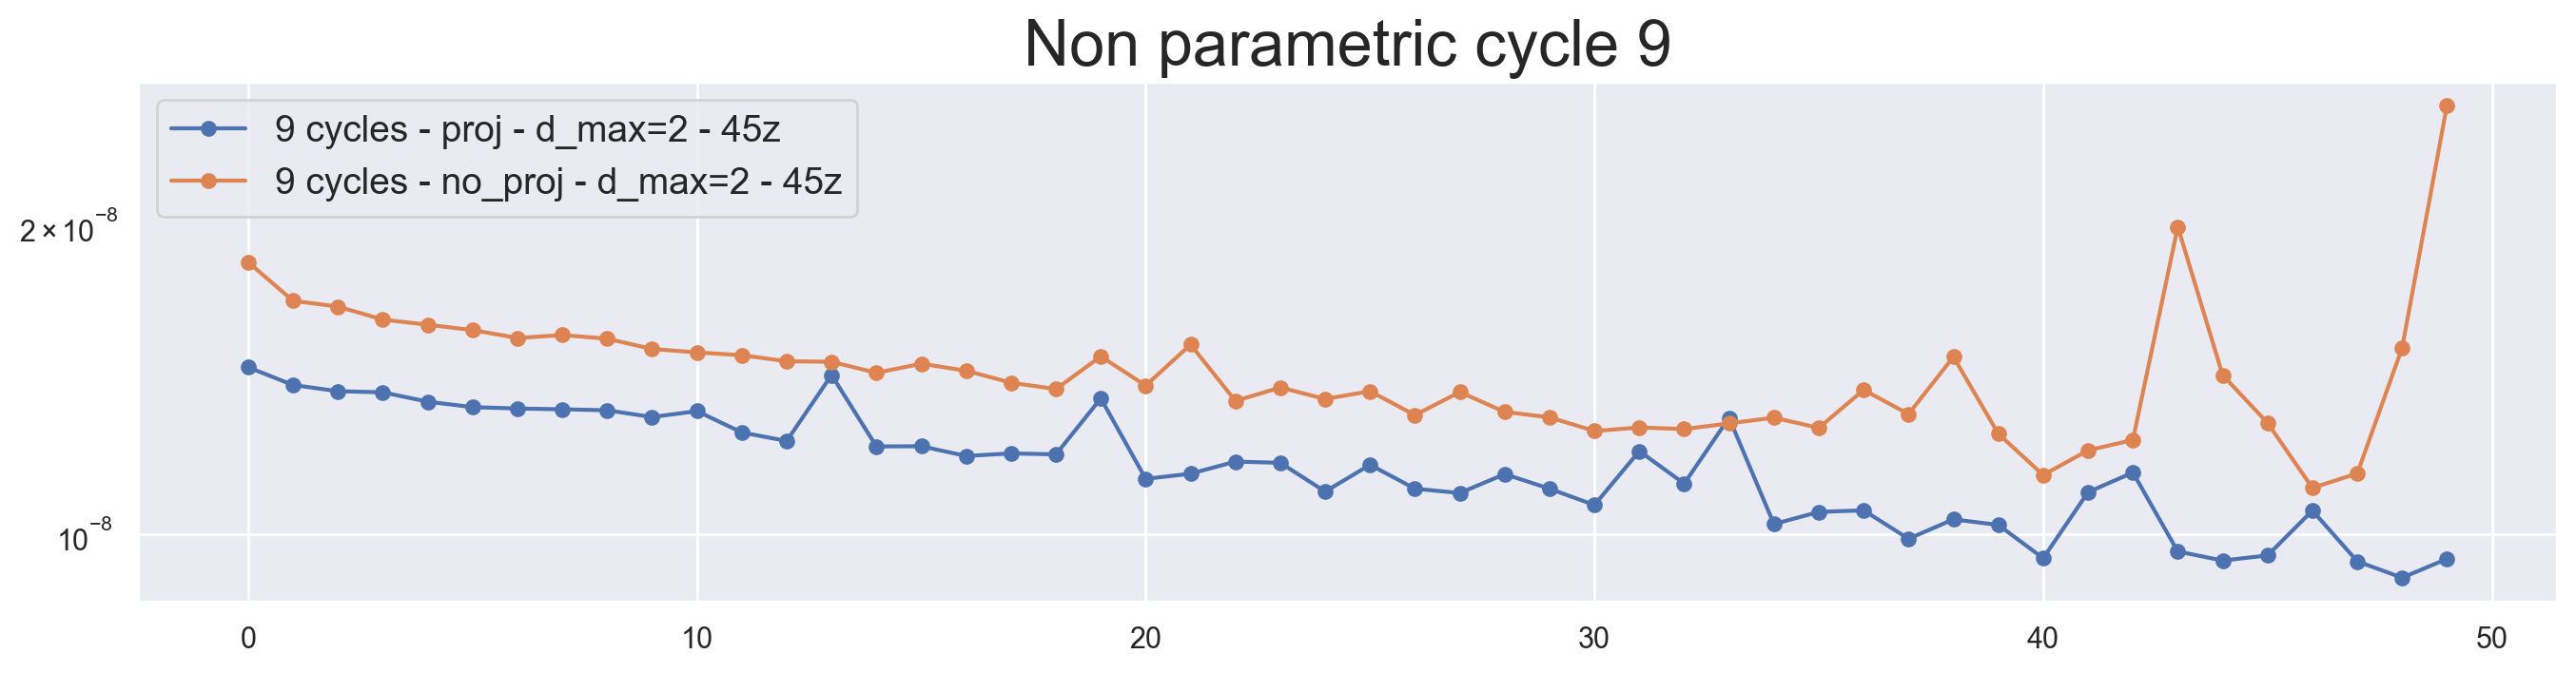

In [7]:
define_plot_style()
plot_loss = 'val_loss' # options are: 'loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'

for cycle_idx in range(n_cycles[-1]):
    plt.figure(figsize=(14,4))
    for idx,hist_stars in enumerate(optim_hist_list):
        if int(dataset_list[idx][0]) >= cycle_idx+1:
            plt.plot(hist_stars['param_cycle{}'.format(cycle_idx+1)][plot_loss], label='%s cycles - %s - d_max=%s - %sz' % dataset_list[idx])
    #plt.yscale('log')
    plt.title('Parametric cycle {}'.format(cycle_idx+1))
    plt.legend()
    plt.show()

    plt.figure(figsize=(14,4))
    for idx,hist_stars in enumerate(optim_hist_list):
        if int(dataset_list[idx][0]) >= cycle_idx+1:
            plt.plot(hist_stars['nonparam_cycle{}'.format(cycle_idx+1)][plot_loss], label='%s cycles - %s - d_max=%s - %sz' % dataset_list[idx])
    plt.yscale('log')
    plt.title('Non parametric cycle {}'.format(cycle_idx+1))
    plt.legend()
    plt.show()



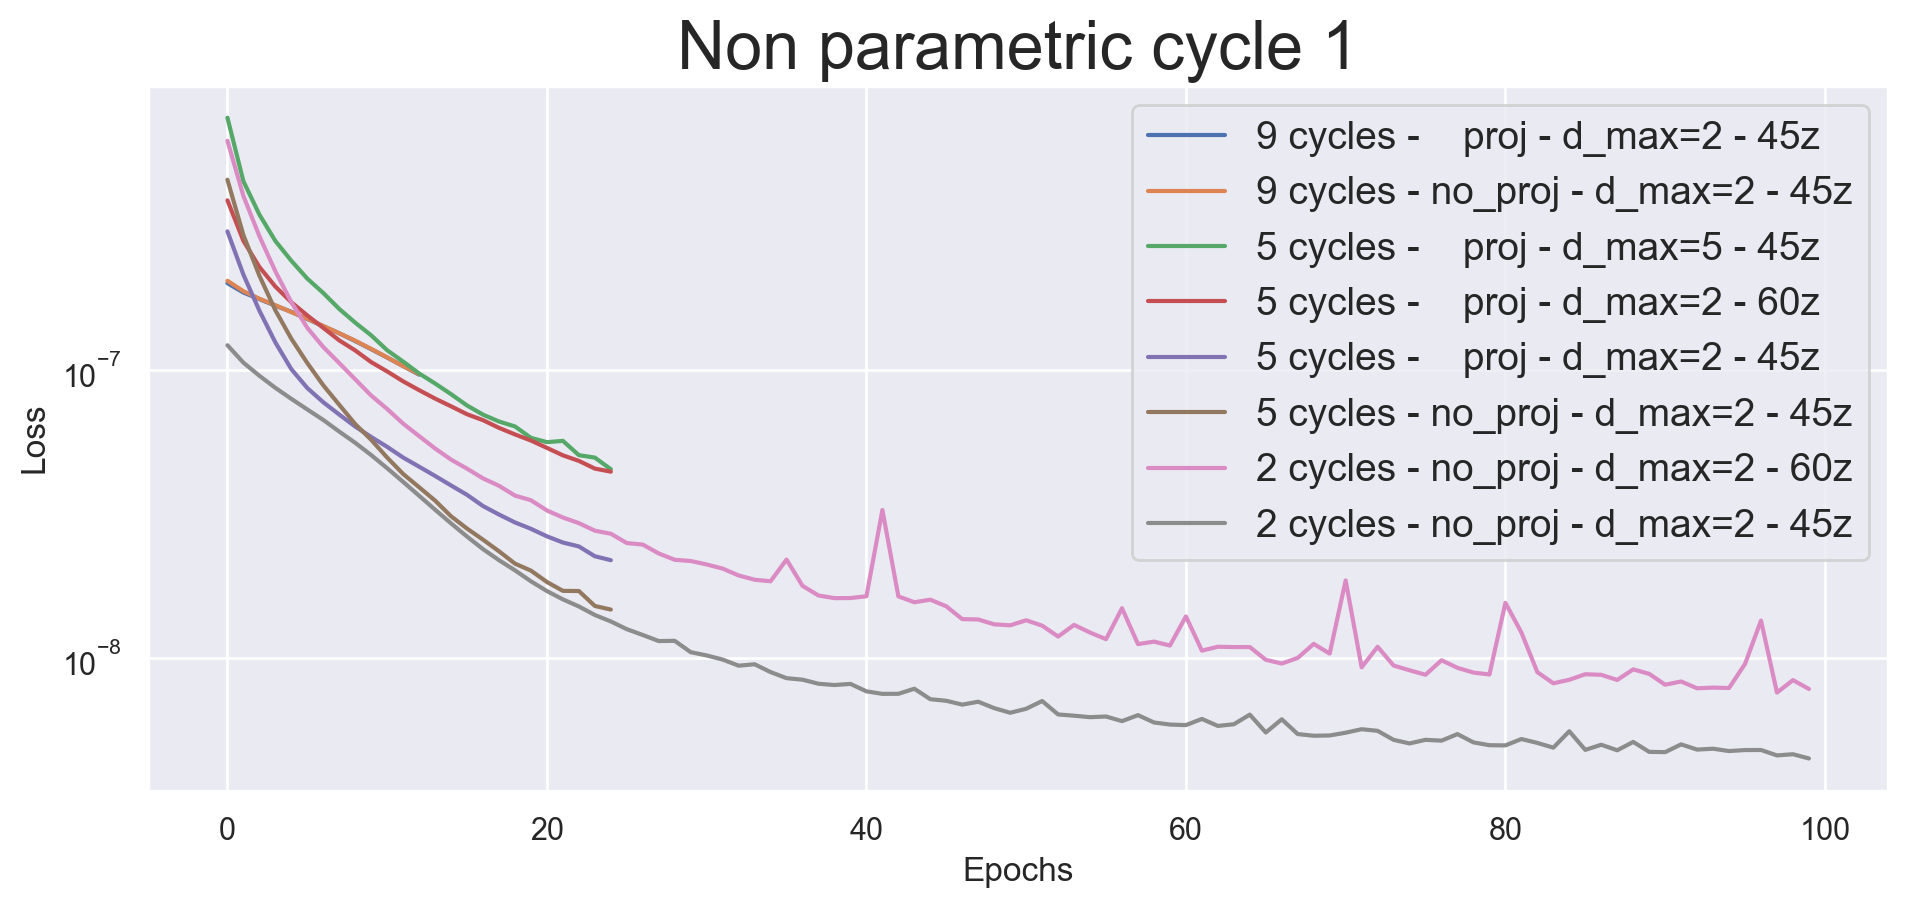

In [34]:
define_plot_style()
cycle_idx = 0
plot_loss = 'val_loss' # options are: 'loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'


plt.figure(figsize=(10,5))
for idx,hist_stars in enumerate(optim_hist_list):
    if int(dataset_list[idx][0]) >= cycle_idx+1:
        plt.plot(hist_stars['nonparam_cycle{}'.format(cycle_idx+1)][plot_loss], label='%s cycles - %7s - d_max=%s - %sz' % dataset_list[idx])
plt.yscale('log')
plt.title('Non parametric cycle {}'.format(cycle_idx+1))
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.savefig('../figures/optimisation_curves_no_reset.pdf')
plt.show()